In [2]:
import pandas as pd
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("atleti-liverpool.csv")
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,relatedPlayerId,cardType/value,cardType/displayName,qualifiers/10/value,qualifiers/11/type/value,qualifiers/11/type/displayName,qualifiers/11/value,satisfiedEventsTypes/12,satisfiedEventsTypes/13,satisfiedEventsTypes/14
0,2184853653,2,0,0.0,63,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2184853649,2,0,0.0,26,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2184853663,3,0,1.0,26,49.9,49.9,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2184853675,4,0,3.0,26,37.3,56.4,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2184853677,5,0,7.0,26,68.0,96.5,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,2184874627,740,93,57.0,63,68.7,62.4,95,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1719,2184874621,738,93,58.0,63,69.7,60.6,95,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1720,2184874631,1168,94,5.0,26,4.7,57.1,96,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721,2184874629,741,94,7.0,63,0.0,0.0,96,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[df['type/displayName'] == 'Pass'][['x' , 'y' , 'teamId']]

,x,y,teamId
2,49.9,49.9,26
3,37.3,56.4,26
7,24.4,4.6,63
12,31.9,2.5,63
14,41.4,0.0,63
...,...,...,...
1711,78.2,92.0,63
1713,21.5,17.7,26
1715,22.8,20.7,26
1717,24.6,24.0,26


In [5]:
teams = pd.read_csv("atleti-liverpool_squad.csv")
teams

,4511,23285,24248,33568,68659,73399,74341,76662,77059,77564,...,132962,135914,136451,238940,243510,254582,262838,318871,326646,344156
0,James Milner,Antonio Adán,Diego Costa,Georginio Wijnaldum,Jordan Henderson,Adrián,Joel Matip,Jan Oblak,Sime Vrsaljko,Stefan Savic,...,Thomas Lemar,José Giménez,Joseph Gomez,Thomas Partey,Naby Keita,Marcos Llorente,Takumi Minamino,Trent Alexander-Arnold,Renan Lodi,Mario Hermoso


In [6]:
teams = teams.transpose()

In [7]:
teams=teams.reset_index()

In [8]:
teams.rename(columns = {'index' : 'playerId' , 0 : 'name'} , inplace = True)

In [9]:
teams.head()

,playerId,name
0,4511,James Milner
1,23285,Antonio Adán
2,24248,Diego Costa
3,33568,Georginio Wijnaldum
4,68659,Jordan Henderson


In [10]:
df['playerId'].fillna(0 , inplace = True)
df['playerId'] = df['playerId'].astype(int)

In [ ]:
df[['playerI']]

In [11]:
teams['playerId'] = teams['playerId'].astype(int)

In [12]:
df = df.merge(teams , on = 'playerId')

In [13]:
df[['x' , 'y' , 'name' , 'teamId']]

,x,y,name,teamId
0,49.9,49.9,Jordan Henderson,26
1,39.1,73.0,Jordan Henderson,26
2,32.7,5.9,Jordan Henderson,26
3,49.9,49.9,Jordan Henderson,26
4,59.2,74.7,Jordan Henderson,26
...,...,...,...,...
1705,56.9,95.6,James Milner,26
1706,79.1,93.2,James Milner,26
1707,80.5,93.6,James Milner,26
1708,55.8,96.5,James Milner,26


In [14]:
def give_team(x) :
    if x == 26 :
        return 'Liverpool'
    
    else :
        return 'Atleti'
    

df['team_name'] = df['teamId'].apply(lambda x : give_team(x))

In [25]:
df[df['type/displayName'] == 'SubstitutionOff'][['name' , 'minute']]

,name,minute
71,Jordan Henderson,79
265,Sadio Mané,45
372,Ángel Correa,76
728,Thomas Lemar,45
1433,Álvaro Morata,69
1578,Mohamed Salah,71


In [16]:
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId', 'qualifiers/0/type/value',
       'qualifiers/0/type/displayName', 'qualifiers/0/value',
       'qualifiers/1/type/value', 'qualifiers/1/type/displayName',
       'qualifiers/1/value', 'qualifiers/2/type/value',
       'qualifiers/2/type/displayName', 'qualifiers/2/value',
       'qualifiers/3/type/value', 'qualifiers/3/type/displayName',
       'qualifiers/3/value', 'qualifiers/4/type/value',
       'qualifiers/4/type/displayName', 'qualifiers/4/value',
       'satisfiedEventsTypes/0', 'satisfiedEventsTypes/1',
       'satisfiedEventsTypes/2', 'satisfiedEventsTypes/3',
       'satisfiedEventsTypes/4', 'satisfiedEventsTypes/5',
       'satisfiedEventsTypes/6', 'endX', 'endY', 'qualifiers/5/type/value',
       'qualifiers/5/type/displayName', 'q

In [26]:
## A function that will return average location of players and the dataframe that has passing between pairs

def build_net(df , team) :
    ##Filter the df with only passes completed by the given team
    spain_passes = df[df['team_name'] == team][['x' ,'y' , 'name' , 'minute']]
    team_heat = spain_passes
    
    ##Find 1st substitution

    minute = df[(df['type/displayName'] == 'SubstitutionOff') &(df['team_name'] == team)]['minute'].min()
    ##Consider passes till only 1st sub
    spain_passes = spain_passes[spain_passes['minute']<minute]
    
    
    
    
    
    ##Calculate average player positions based on the pass starting ppoints
    average_positions = spain_passes.groupby('name').mean()
    average_positions = average_positions.reset_index()
    
    
    ## Accept the jersey numbers for the players.
    ##As they are not in the dataframe already
    jerseys = pd.DataFrame(columns = ['name' , 'number'])
    jerseys['name'] = average_positions['name']
    
    for player in range(len(average_positions)) :
        num = int(input(f"Enter jersey number for {average_positions.iloc[player]['name']}"))
        #jerseys['number'] = [21 , 1 , 19 , 22 , 3 , 18 , 8 , 4 , 20 , 5 , 15]
        jerseys.iloc[player]['number'] = num
    
    
    

    average_positions = average_positions.merge(jerseys , on = 'name')
    average_positions['x'] = average_positions['x']*1.2
    average_positions['y'] = average_positions['y']*0.8
    
    return average_positions , team_heat

In [58]:
##Function to draw the network
def draw_network(team1_heat , team2_heat  , team1_avg , team2_avg , team1 , team2) :
    ##Passing Network for the 1st team
    
    pitch = Pitch(figsize=(30,30) , pitch_type='statsbomb'  , orientation='vertical'  , pitch_color = '#22312b'  )
    
    fig = plt.figure(figsize=(40,40))
    ax1 = fig.add_subplot(121)
    pitch.draw(ax=ax1)
    team1_avg.rename(columns = {'x' : 'start_x' , 'y' : 'start_y'}  , inplace = True)
    team2_avg.rename(columns = {'x' : 'start_x' , 'y' : 'start_y'} , inplace = True)
    
     

    pitch.scatter(team1_avg['start_x'] , team1_avg['start_y'] , ax = ax1 , s = 2500 , color = 'white')
    ##Loop through the average position df to plot the average location of each player
    for p in range(len(team1_avg)) :
        pitch.annotate(text = team1_avg.iloc[p]['number'] , xy = (team1_avg.iloc[p]['start_x'] , team1_avg.iloc[p]['start_y']) ,
                      ax=ax1 , c='#132743', va='center', ha='center', size=30, fontweight='bold', fontfamily="Century Gothic")
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    
    ##We'll be plotting only passes between pairs that happened more than twice
    
    sns.kdeplot(y = team1_heat['x']*1.2 , x = team1_heat['y']*0.8 , n_lines = 10 , fill =True , cmap = 'mako' , thresh = 0.45 , alpha = 0.5)
    plt.ylim(0,120)
    plt.xlim(80,0)
    
    ##Describe 
    ax1.set_title(f"{team1} against {team2} | Until First Sub", fontsize=18, color="w", fontfamily="Andale Mono", fontweight='bold', pad=-30)
    
    
    
    
   
    
    
    
    ##Passing network for the 2nd team
    ax2 = fig.add_subplot(122)
    pitch.draw(ax=ax2)

    pitch.scatter(team2_avg['start_x'] , team2_avg['start_y'] , ax = ax2 , s = 1500 , color = 'white')

    for p in range(len(team2_avg)) :
        pitch.annotate(text = team2_avg.iloc[p]['number'] , xy = (team2_avg.iloc[p]['start_x'] , team2_avg.iloc[p]['start_y']) ,
                      ax=ax2 , c='#132743', va='center', ha='center', size=30, fontweight='bold', fontfamily="Century Gothic")

    
    sns.kdeplot(y = team2_heat['x']*1.2 , x = team2_heat['y']*0.8 , n_lines = 10 , fill =True , cmap = 'mako' , thresh = 0.4 , alpha = 0.5)
    
    ax2.set_title(f"{team2} against {team1} | Until First Sub", fontsize=18, color="w", fontfamily="Andale Mono", fontweight='bold', pad=-30)
    
    pitch.annotate("Node Positions = Average position based on the Start Location of Completed Passes \n Data Source - whoscored", (110,50), color='w',
               fontsize=15, ha='center', va='center', ax=ax1, fontweight='bold', fontfamily="Andale Mono")
    
    pitch.annotate("Node Positions = Average position based on the Start Location of Completed Passes \n Data Source - whoscored", (110,50), color='w',
               fontsize=15, ha='center', va='center', ax=ax2, fontweight='bold', fontfamily="Andale Mono")
    
    #pitch.annotate("Data Source - StatsBomb", (10, 78), color='w',
     #          fontsize=15, ha='center', va='center', ax=ax2, fontweight='bold')
    
    
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xticks()
    plt.yticks()
    plt.ylim(0,120)
    plt.xlim(80,0)
    
    
    ##Save the figure
    plt.savefig('Atleti_vs_Liverpool.jpg', dpi = 50, bbox_inches='tight',facecolor='#22312b')

In [28]:
df[df['type/displayName'] == 'SubstitutionOff']['minute'].min()

45

In [29]:
df['type/displayName'].unique()

array(['Pass', 'Aerial', 'BallTouch', 'Foul', 'Tackle', 'BlockedPass',
       'BallRecovery', 'ShieldBallOpp', 'MissedShots', 'Challenge',
       'SubstitutionOff', 'OffsideProvoked', 'Interception', 'Card',
       'Dispossessed', 'TakeOn', 'Clearance', 'OffsideGiven',
       'CornerAwarded', 'OffsidePass', 'SavedShot', 'Save',
       'KeeperPickup', 'ChanceMissed', 'KeeperSweeper', 'Goal',
       'SubstitutionOn'], dtype=object)

In [20]:
spain_passes = df[(df['type/displayName'] == 'Pass') & (df['team_name'] == 'Chelsea')][['x' ,'y' , 'name' , 'minute']]
    
    ##Find 1st substitution

minute = df[(df['type/displayName'] == 'SubstitutionOff') &(df['team_name'] == 'Chelsea')]['minute'].min()
##Consider passes till only 1st sub
spain_passes = spain_passes[spain_passes['minute']<minute]





##Calculate average player positions based on the pass starting ppoints
average_positions = spain_passes.groupby('name').mean()
average_positions = average_positions.reset_index()

In [30]:
liverpool_avg , liverpool_heat = build_net(df , "Liverpool")
Atleti_avg , atleti_heat = build_net(df , "Atleti")

Enter jersey number for Alisson 1
Enter jersey number for Andrew Robertson 26
Enter jersey number for Fabinho 3
Enter jersey number for Georginio Wijnaldum 5
Enter jersey number for Jordan Henderson 14
Enter jersey number for Joseph Gomez 12
Enter jersey number for Mohamed Salah 11
Enter jersey number for Roberto Firmino 9
Enter jersey number for Sadio Mané 10
Enter jersey number for Trent Alexander-Arnold 66
Enter jersey number for Virgil van Dijk 4
Enter jersey number for Felipe 18
Enter jersey number for Jan Oblak 13
Enter jersey number for Koke 6
Enter jersey number for Renan Lodi 12
Enter jersey number for Saúl Ñíguez 8
Enter jersey number for Sime Vrsaljko 24
Enter jersey number for Stefan Savic 15
Enter jersey number for Thomas Lemar 11
Enter jersey number for Thomas Partey 5
Enter jersey number for Álvaro Morata 9
Enter jersey number for Ángel Correa 10


C:\Conda\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'n_lines'
  cset = contour_func(
C:\Conda\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'n_lines'
  cset = contour_func(


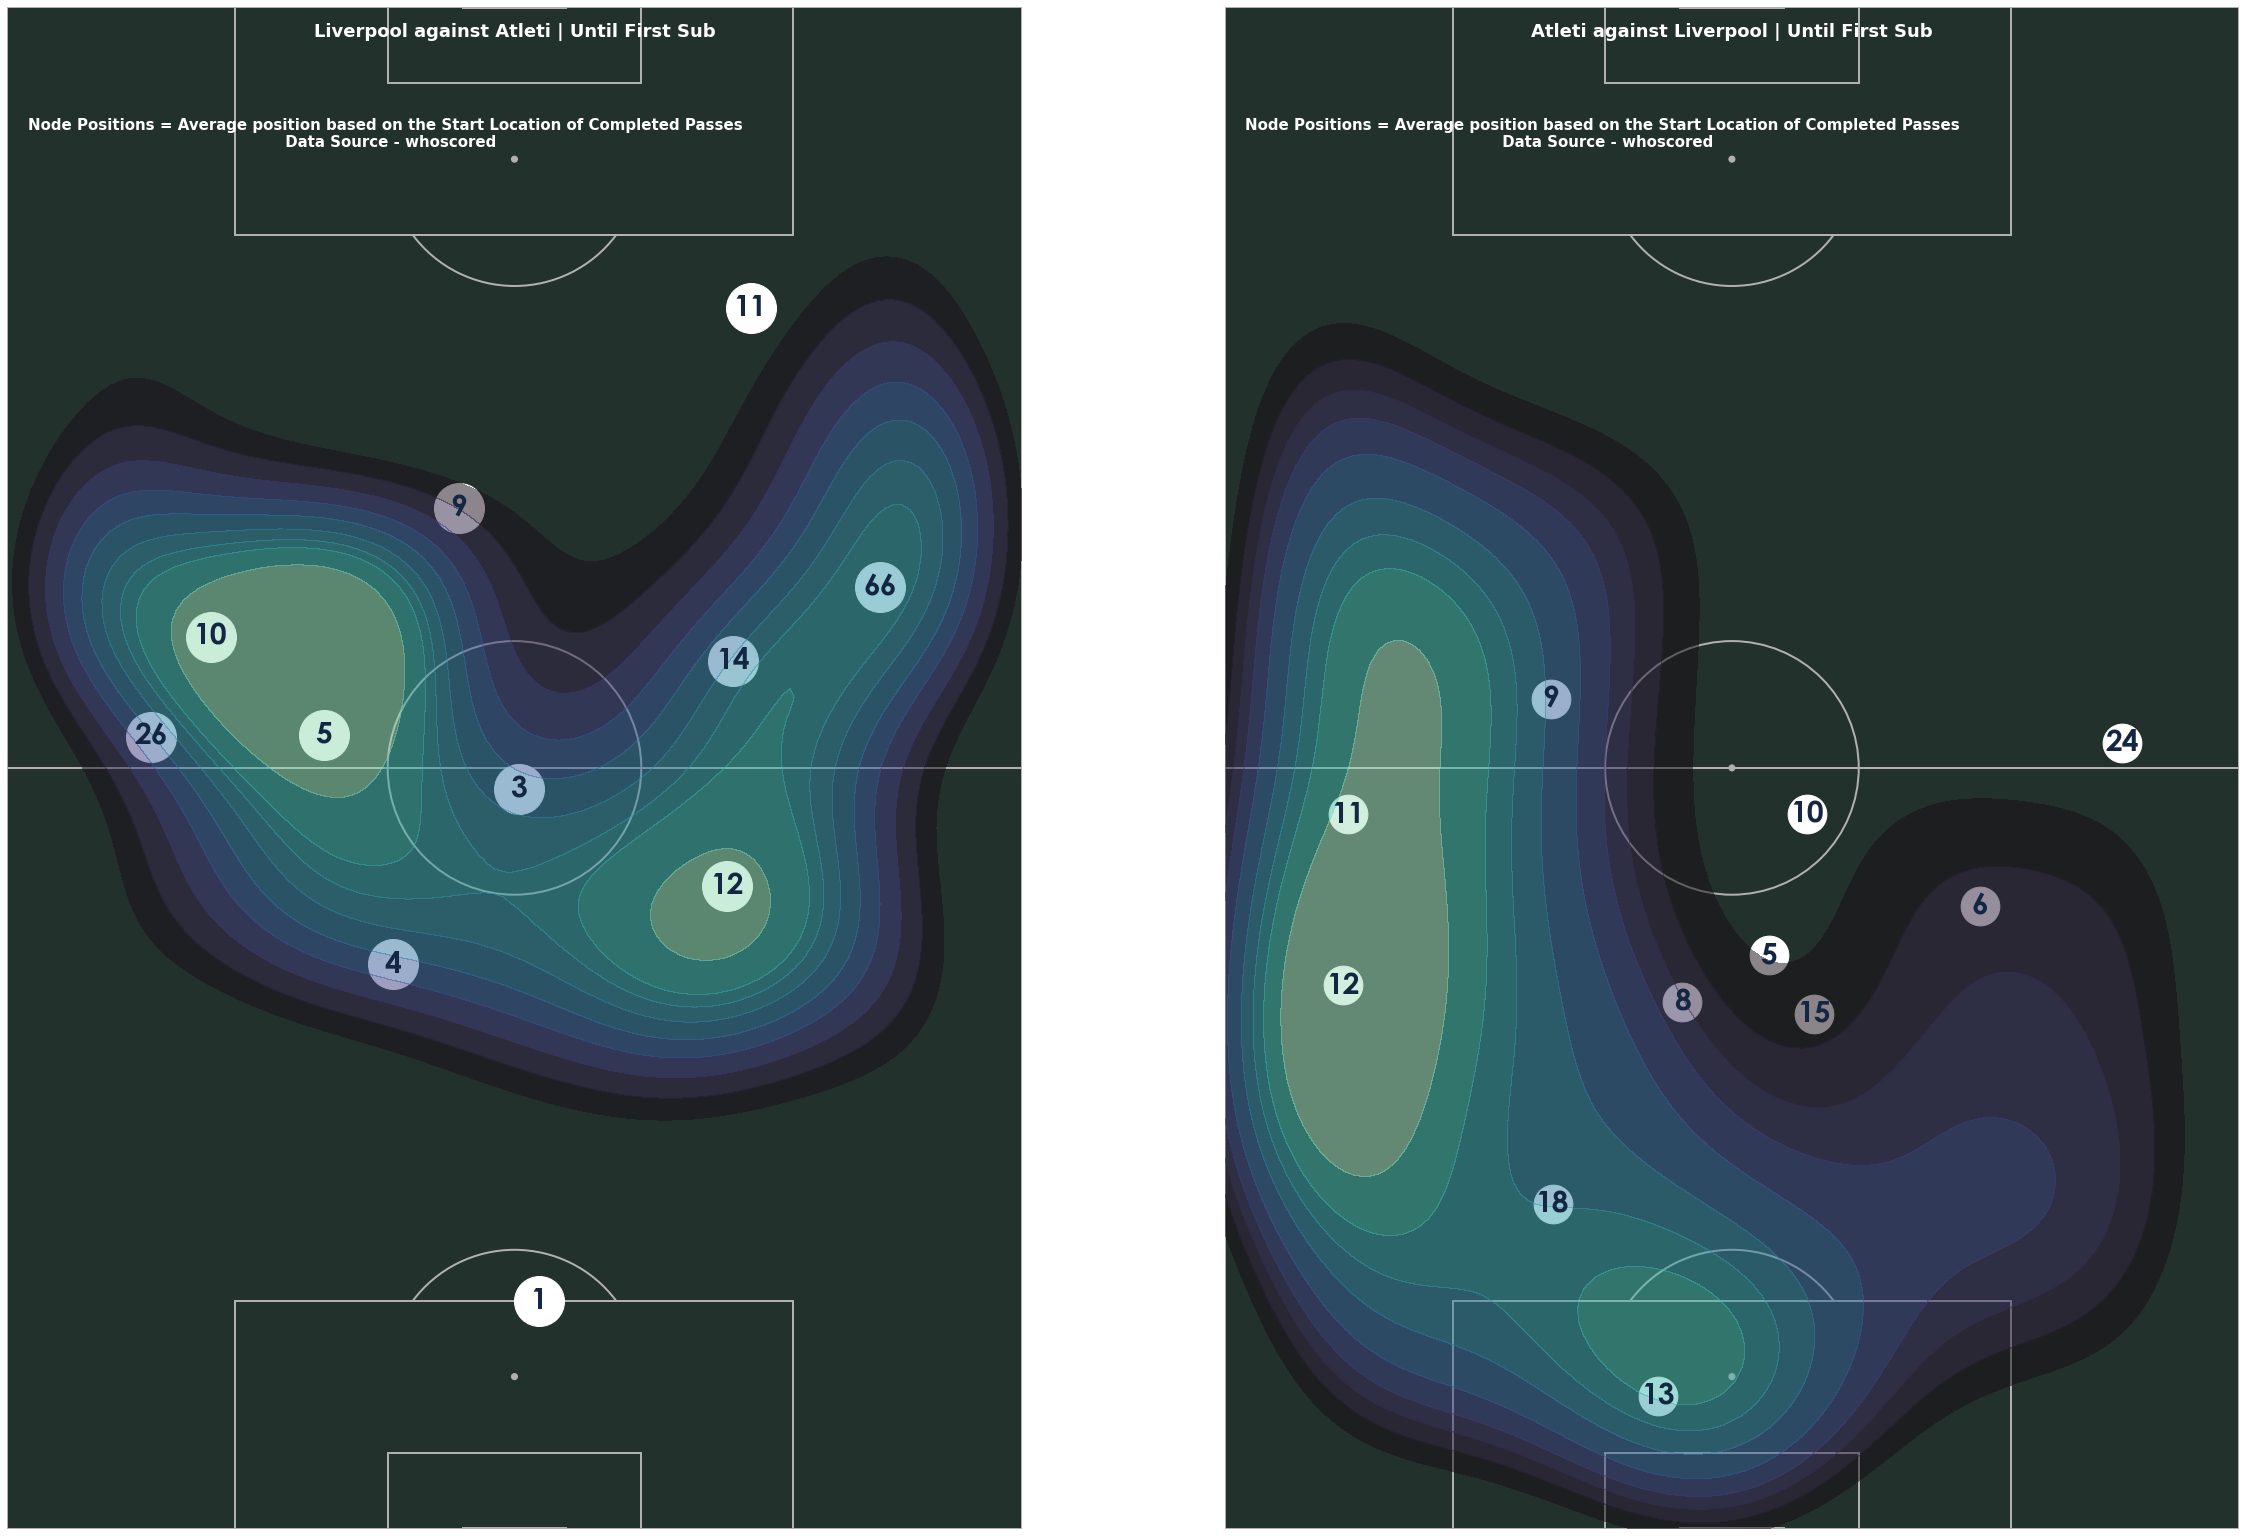

In [59]:
draw_network(team1_heat = liverpool_heat,team2_heat = atleti_heat , team1_avg=liverpool_avg , team2_avg=Atleti_avg , team1='Liverpool' , team2 = 'Atleti')

In [37]:
chelsea_avg.rename(columns = {'x' : 'start_x'} , {'y' : 'start_y'})

SyntaxError: positional argument follows keyword argument (<ipython-input-37-9e44306a06b3>, line 1)

<AxesSubplot:xlabel='start_x', ylabel='start_y'>

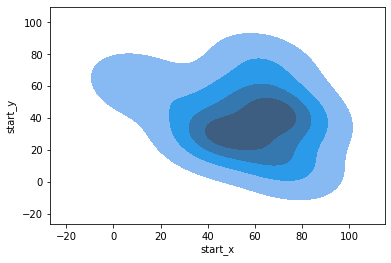

In [57]:
sns.kdeplot(x = Atleti_avg['start_x'] , y = chelsea_avg['start_y'] , levels = 5 , fill = True , palette = 'magma')

In [42]:
chelsea_heat['x'].max()

99.6

In [48]:
df[(df['type/displayName'] == 'Pass') & (df['name'] == 'Koke')]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,qualifiers/12/type/displayName,blockedX,blockedY,qualifiers/12/value,qualifiers/13/type/value,qualifiers/13/type/displayName,qualifiers/13/value,isGoal,name,team_name
751,2268212599,5,0,27,63,32.9,15.1,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
752,2268213027,7,1,25,63,65.9,57.9,1,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
753,2268213103,10,1,33,63,64.2,22.5,1,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
754,2268214151,26,3,22,63,33.7,5.9,3,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
755,2268218353,44,7,19,63,34.6,66.3,7,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
756,2268219175,52,8,3,63,62.9,10.4,8,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
757,2268220165,62,8,52,63,75.0,14.9,8,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
758,2268220945,70,9,31,63,72.6,8.6,9,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
759,2268224087,89,12,16,63,31.9,40.4,12,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
760,2268225673,113,13,42,63,57.5,5.6,13,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
